# 4. Exploratory Data Analysis

**탐색적 데이터 분석을 통해 데이터를 통달해봅시다.** with [Titanic Data](https://www.kaggle.com/c/titanic)

0. 라이브러리 준비
1. 분석의 목적과 변수 확인
2. 데이터 전체적으로 살펴보기
3. 데이터의 개별 속성 파악하기

## 0. 라이브러리 준비

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
titanic_df = pd.read_csv("./train.csv")

## 1. 분석의 목적과 변수 확인

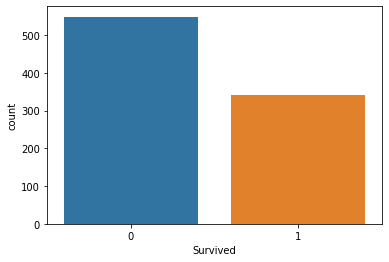

In [374]:
titanic_df.head(5)

titanic_df.dtypes

titanic_df.describe() #수치형 데이터에 대한 요약만 제공

titanic_df.corr() # 상관계수 확인

titanic_df.isnull().sum() # 결측치 확인

titanic_df['Survived'].value_counts()
sns.countplot(x='Survived', data=titanic_df)
plt.show()

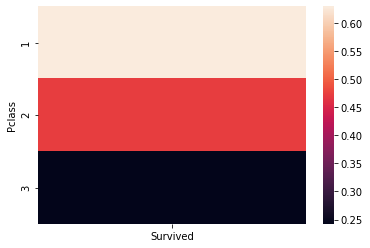

In [375]:
# Pclass 별 탑승 인원
titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).count()

# Pclass 별 생존자 인원
titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).sum()

# Pclass 별 생존자 비율
titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).mean()

sns.heatmap(titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).mean())
plt.show()

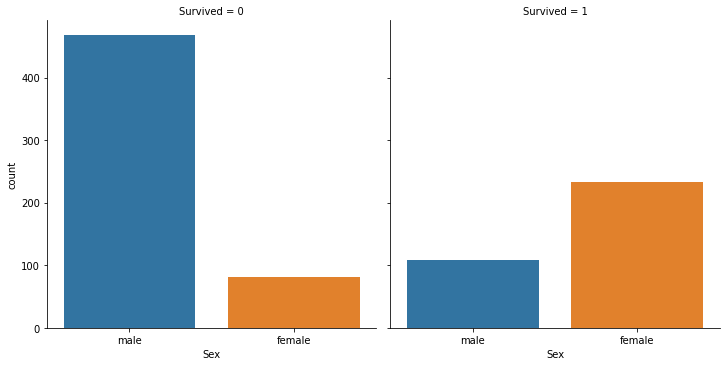

In [377]:
# 성별에 따른 생존 인원
titanic_df.groupby(['Survived','Sex'])['Survived'].count()
sns.catplot(x='Sex', col ='Survived', kind='count', data=titanic_df)
plt.show()

## 2. 데이터 전체적으로 살펴보기

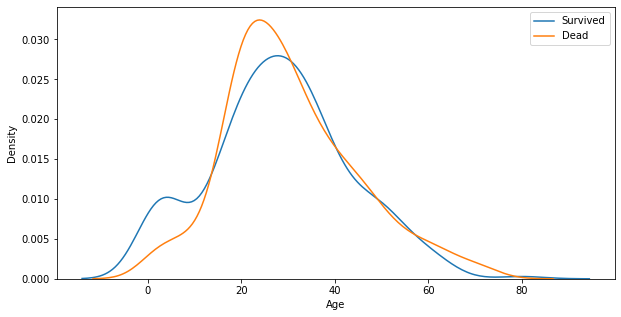

In [378]:
fig, ax = plt.subplots(1,1,figsize=(10,5))

sns.kdeplot(x=titanic_df[titanic_df.Survived == 1]['Age'],ax=ax)
sns.kdeplot(x=titanic_df[titanic_df.Survived == 0]['Age'],ax=ax)
plt.legend(['Survived', 'Dead'])
plt.show()

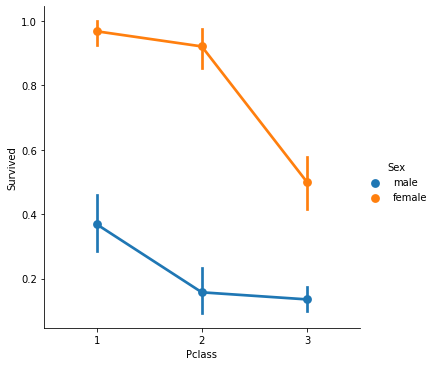

In [379]:
sns.catplot(x='Pclass', y = 'Survived', hue= 'Sex',kind='point', data=titanic_df)
plt.show()

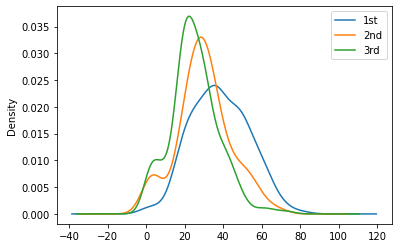

In [381]:
titanic_df['Age'][titanic_df.Pclass==1].plot(kind='kde')
titanic_df['Age'][titanic_df.Pclass==2].plot(kind='kde')
titanic_df['Age'][titanic_df.Pclass==3].plot(kind='kde')

plt.legend(['1st','2nd','3rd'])
plt.show()

## Mission : It's Your Turn!

### 1. 본문에서 언급된 Feature를 제외하고 유의미한 Feature를 1개 이상 찾아봅시다.

- Hint : Fare? Sibsp? Parch?

### 2. [Kaggle](https://www.kaggle.com/datasets)에서 Dataset을 찾고, 이 Dataset에서 유의미한 Feature를 3개 이상 찾고 이를 시각화해봅시다.

함께 보면 좋은 라이브러리 document
- [numpy]()
- [pandas]()
- [seaborn]()
- [matplotlib]()

#### 1. Sibsp와 생존간의 연관성

가설 : 두 명이상이 함께 탑승한 경우 서로 도울수 있으므로, 혼자 타는 경우보다 생존율이 높을 것이다.

동승자가 있는 경우, 혼자탄 경우보다 생존할 가능성이 더 높은 것으로 보인다.

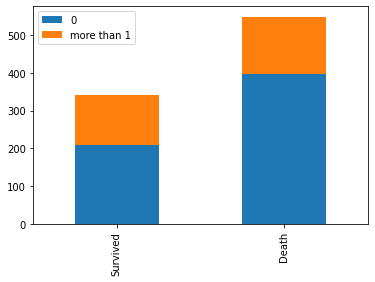

In [253]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
titanic_df = pd.read_csv("./train.csv")

survived = titanic_df[titanic_df['Survived']==1]['SibSp'].value_counts()
death = titanic_df[titanic_df['Survived']==0]['SibSp'].value_counts()

df = pd.DataFrame([survived, death])
df.index = ['Survived','Dead']
df[1] = df.sum(axis=1) - df[0]

for i in df:
    if i > 1:
        df = df.drop(i,axis=1)
        
df.index = ['Survived','Death']
df.plot(kind='bar',stacked=True)
plt.legend(['0','more than 1'])
plt.show()

#### 2. 심장 질환 데이터 분석

- 각 데이터 속성 확인

age : 나이 (int)  
sex : 성별 (0:female, 1= male)  
cp : 통증 유형(0,1,2,3)  
trestbps : 안정시 혈압  
chol : 콜레스테롤 수치  
fbs : 공복시 혈당(120mg 보다 높으면 1, 낮으면 0)  
restecg : 휴식 중 심전도 결과(0,1,2) // 값의 의미는 잘 모르겠음  
thalach : 최대 심박수  
exang : 운동 유발 협심증? (1 : 예, 2 : 아니오)  // ????  
oldpeak : 휴식에 비해 운동으로 인해 유발된 ST 우울증 // ???  
slope : ST 세그먼트의 기울기  
ca : 뭔가로 착색된 주요 혈관의 수 (0~3)  
thal : 3 = 정상; 6 = 고정 된 결함; 7 = 가역적 결함(아마도 1,2,3에 매핑된줄 알았는데, 0도 끼어있었다. 일단 무시하자)  
target : 0,1로 분류되어있는데, 뭐가 심장질환이고 뭐가 정상인지를 모르겠다. 일반적으로 생각해서 1을 심장질환이라고 가정하자  

In [341]:
heart = pd.read_csv("./heart.csv")
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

우선 **NULL** 데이터가 없으므로 신경쓰지 않고 데이터를 바로 사용해도 될것 같다.

In [255]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


target을 봤을 때 평균이 0.54 정도 되니, 전체적인 비율은 균형이 잡힌 것 같다.  

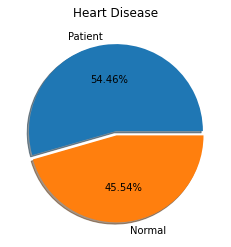

In [285]:
plt.pie(heart['target'].value_counts(), labels = ['Patient','Normal'], autopct='%1.2f%%', shadow=True, explode = [0,0.05])
plt.title('Heart Disease')
plt.show()

심장질환환자가 정상인보다 더 많은 것을 볼 수 있다.  

1. 성별과의 관계

In [320]:
heart_sex = heart[['sex','target']].groupby(['sex']).mean()
heart_sex

,target
sex,
0,0.750000
1,0.449275


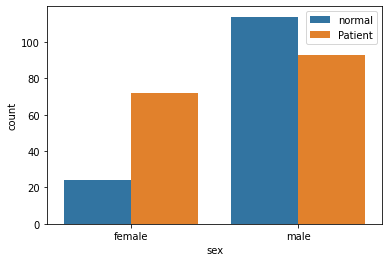

In [324]:
sns.countplot(x = 'sex', hue='target', data=heart)
plt.xticks([0,1],['female', 'male'])
plt.legend(['normal', 'Patient'])

plt.show()

여성이 남성보다 심장질환이 있을 확률이 압도적으로 높은 것을 볼 수 있다.

2. 나이와의 관계

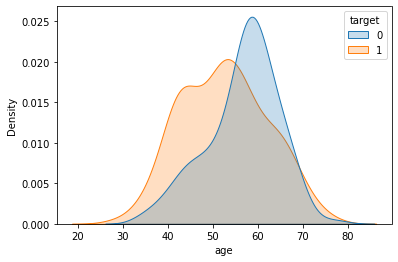

In [342]:
sns.kdeplot('age',hue = 'target', shade=True, data = heart)
plt.show()

심장질환을 겪고 있는 사람들은 주로 40~50대에 집중되어 있는 것을 볼 수 있다.  
반대로 심장질환이 없는 사람들은 주로 60대이다.  

이를 바탕으로, 우리는 비교적 젊은 나이대에서 심장질환이 많이 발생한다고 유추할 수 있다.  

3. 통증에 따른 심장질환 유무

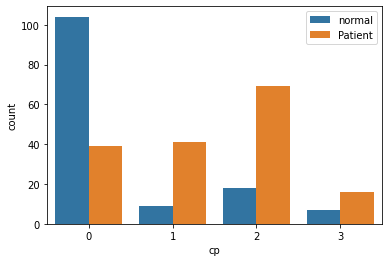

In [325]:
sns.countplot(x = 'cp', hue='target', data=heart)
plt.legend(['normal', 'Patient'])

통증 유형이 세부적으로 어떤지는 모르겠지만(아마 0은 통증이 없다는걸 의미하지 않을까).   
0인 사람들은 심장질환이 없는 경우가 대부분이며,  
이외의 경우 심장질환을 의심해봐야 한다.  


4. 최대 심박수와 심장 질환의 관계

c:\users\dk\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\dk\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\dk\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot`

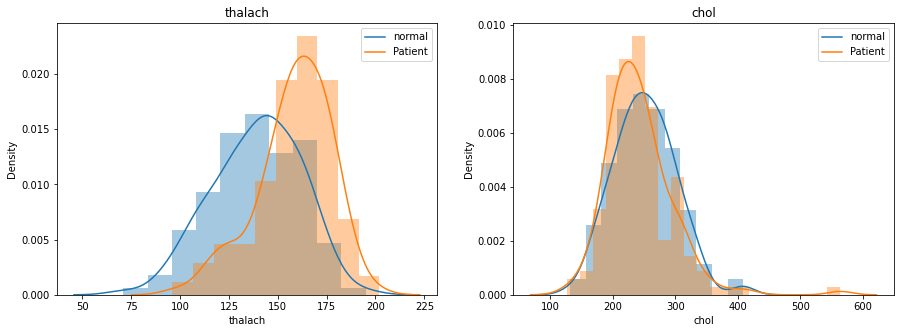

In [373]:
fig, ax = plt.subplots(ncols=2, figsize=(15,5))
ax[0].set_title('thalach')
ax[1].set_title('chol')
sns.distplot(heart['thalach'][heart['target']==0], bins = 10, ax = ax[0])
sns.distplot(heart['thalach'][heart['target']==1], bins = 10, ax = ax[0])

sns.distplot(heart['chol'][heart['target']==0], ax = ax[1])
sns.distplot(heart['chol'][heart['target']==1], ax = ax[1])
ax[0].legend(['normal', 'Patient'])
ax[1].legend(['normal', 'Patient'])
plt.show()

혈중 콜레스테롤 수치가 영향이 있을 줄 알았는데, 그래프로 봐서는 별로 차이가 없는 것 같다.  

반면 최대 심박수가 높게 나타날수록 심장질환이 있을 확률이 높아지는 것을 확인할 수 있다.  